Research Focus:
Investigate the themes and motifs in the works of William Shakespeare. Use stemming and lemmatization to preprocess the text and perform a thematic analysis. Focus on identifying recurring themes such as power, love, betrayal, ambition, and fate across different plays and sonnets.

In [1]:
# Module to remove punctuation from string library
from string import punctuation
# Module to count word frequencies
from collections import Counter
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
from nltk.corpus import stopwords
import spacy


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Graphics should appear "inline" (within the Jupyter Notebook instead of somewhere else)
%matplotlib inline
plt.style.use('classic')
import seaborn as sns

In [3]:
import os
os.getcwd()

'/Users/amyhuang'

In [4]:
os.chdir("/Users/amyhuang/Desktop/")
os.getcwd()

'/Users/amyhuang/Desktop'

In [5]:
text = open("shakespeare.txt").read()
print(text)

THE SONNETS

by William Shakespeare

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And tender churl mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.

When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a tattered weed of small worth held:  
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say within thine own deep sunken eyes,
Were an all-eating shame, and thriftless prais

How many words in this file?

In [6]:
len(text.split())

17589

Unique words in this text

In [7]:
#how many unique words
len(set(text.split()))

4578

In [8]:
# Print the unique words 
print(set(text.lower().split()))

{'unjust?', 'wide.', 'their', 'april', 'sounds', 'harvest', 'cold.', 'answered', 'yours,', 'dun:', 'fuel,', 'thrusts', 'child!', 'stand,', 'approve,', 'denote,', 'watching', 'rehearse?', 'hope,', 'bosom', 'perjured,', 'decrees', 'again.', 'calls', 'autumn', 'this', 'assemble:', 'learning', 'love?', 'slay', 'brow:', 'presagers', 'appetite', 'unknown', 'rid', 'enfeebled', 'bower,', 'knit;', 'wolf', 'survive', 'crowning', 'waste', 'more,', 'it,', 'acquaintance', 'pity', 'gaze', 'plague', 'dwellers', 'apparel', 'tripping', 'niggarding:', 'falsehood,', 'thoughts', 'title', 'nurseth', 'elsewhere;', 'deaths,', 'defect,', 'issue', 'move,', 'nobler', 'on', 'continual', 'kingdom', 'anchored', 'changes', 'self-killed:', 'miser', '(perhaps)', 'is)', 'thereby,', 'friends', 'us', 'captive', 'nature', "ne'er-cloying", 'medicine', 'weary', 'truth:', 'nought', 'mounted', 'miscalled', 'coming', 'oppressed', 'dumb,', 'self-substantial', 'imprint', 'dateless', 'seals', 'ranged,', 'party', 'render,', 'warm

The function lowercase the string in Shakespearean works, remove punctuation, tokenize, lemmatize, and remove stopwords. I also extend toppwords with common Shakespearan pronouns such as "I, thy, thou, thee". The function should return the lemmas present in the string. 

In [21]:
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

# Extend stopwords with Shakespearean pronouns
shakespearean_pronouns = {"i", "thy", "thou", "thee", "I"}
stop_words.update(shakespearean_pronouns)

def func(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuation])
    tokens = text.split()
    lemmas = [token.lemma_ for token in nlp(' '.join(tokens)) if token.lemma_ not in stop_words]
    return lemmas

lemmas = func(text)
print(func(text))

['sonnet', 'william', 'shakespeare', 'fair', 'creature', 'desire', 'increase', 'thereby', 'beautys', 'rise', 'might', 'never', 'die', 'riper', 'time', 'decease', 'tender', 'heir', 'might', 'bear', 'memory', 'contract', 'thine', 'bright', 'eye', 'feedst', 'light', 'flame', 'selfsubstantial', 'fuel', 'make', 'famine', 'abundance', 'lie', 'self', 'foe', 'sweet', 'self', 'cruel', 'art', 'world', 'fresh', 'ornament', 'herald', 'gaudy', 'spring', 'within', 'thine', 'bud', 'buriest', 'content', 'tender', 'churl', 'makst', 'waste', 'niggarde', 'pity', 'world', 'else', 'glutton', 'eat', 'world', 'due', 'grave', 'forty', 'winter', 'shall', 'besiege', 'brow', 'dig', 'deep', 'trench', 'beautys', 'field', 'youth', 'proud', 'livery', 'gaze', 'tattered', 'weed', 'small', 'worth', 'hold', 'ask', 'beauty', 'lie', 'treasure', 'lusty', 'day', 'say', 'within', 'thine', 'deep', 'sunken', 'eye', 'alleating', 'shame', 'thriftless', 'praise', 'much', 'praise', 'deserve', 'beauty', 'use', 'couldst', 'answer', 

In [22]:
def countFreq(lemmas):
    return Counter(lemmas)

# Calculate frequency of lemmas
freq = countFreq(lemmas) 

# Display the 20 most common words
most_common = freq.most_common(20)
print(most_common)

df = pd.DataFrame(data = most_common, 
                         columns = ["Word", "Frequency"])
df

[('love', 208), ('eye', 94), ('doth', 88), ('make', 82), ('self', 77), ('time', 76), ('mine', 63), ('sweet', 61), ('heart', 61), ('beauty', 60), ('shall', 59), ('see', 56), ('art', 53), ('fair', 52), ('yet', 51), ('give', 46), ('well', 46), ('thine', 44), ('live', 44), ('day', 43)]


,Word,Frequency
0,love,208
1,eye,94
2,doth,88
3,make,82
4,self,77
5,time,76
6,mine,63
7,sweet,61
8,heart,61
9,beauty,60


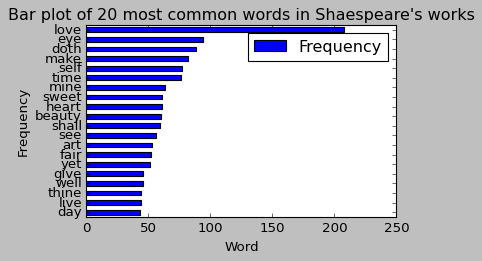

In [19]:
df.plot.barh(x = "Word", y = "Frequency", figsize = (5,3)).invert_yaxis()
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Bar plot of 20 most common words in Shaespeare's works");

# Sentiment Analysis

In [29]:
!pip3 install textblob
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/amyhuang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    for sentence in blob.sentences:
        print(f"Sentence: {sentence}")
        print(f"Sentiment: {sentence.sentiment}")

analyze_sentiment(text)

Sentence: To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them.
Sentiment: Sentiment(polarity=-1.0, subjectivity=1.0)
